In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
# Function to retrieve stock price data
def get_stock_data(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data

In [31]:
# Define the stock symbol and date range
symbol = 'PFE'  # Example stock symbol (Apple Inc.)
start_date = '2023-04-01'
end_date = '2024-04-01'

In [32]:
# Get stock data
stock_data = get_stock_data(symbol, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


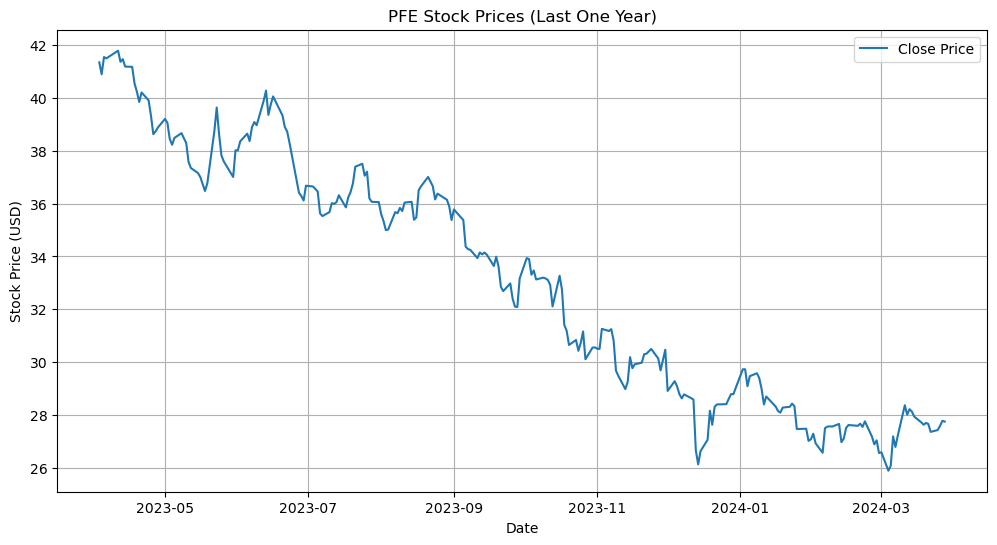

In [45]:
# Plot the stock prices
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Close Price')
plt.title(f'{symbol} Stock Prices (Last One Year)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
# Calculate daily returns
returns = stock_data['Close'].pct_change()
returns

Date
2023-04-03         NaN
2023-04-04   -0.010883
2023-04-05    0.015892
2023-04-06   -0.001203
2023-04-10    0.005542
                ...   
2024-03-22   -0.010846
2024-03-25    0.002558
2024-03-26    0.005833
2024-03-27    0.006887
2024-03-28   -0.001080
Name: Close, Length: 249, dtype: float64

In [47]:
# Calculate mean and standard deviation of daily returns
mean_return = returns.mean()
std_return = returns.std()

In [48]:
mean_return

-0.0014929333413073345

In [49]:
std_return

0.015114431231126465

In [50]:
# Define parameters for the simulation
initial_price = stock_data['Close'].iloc[-1]  # Latest closing price
simulation_days = 30
num_simulations = 100
initial_price

27.75

In [51]:
# Perform Monte Carlo simulation
simulated_prices = np.zeros((simulation_days, num_simulations))
for i in range(num_simulations):
    daily_returns = np.random.normal(mean_return, std_return, simulation_days)
    price_series = initial_price * (1 + np.cumsum(daily_returns))
    simulated_prices[:, i] = price_series
simulated_prices

array([[27.76062846, 28.06108617, 27.51366626, ..., 28.12779322,
        27.38080531, 27.93564752],
       [27.65497093, 27.56554289, 27.85894428, ..., 28.16945627,
        26.96150867, 27.62161606],
       [26.86700867, 27.83657773, 27.93175385, ..., 28.11930703,
        26.49099626, 27.88495764],
       ...,
       [21.93710227, 25.26114189, 23.45851661, ..., 23.9303855 ,
        21.58334941, 27.37895249],
       [21.52575396, 25.26398069, 23.61097719, ..., 23.21894327,
        21.60309411, 26.62315191],
       [21.85472308, 24.95663514, 23.60850141, ..., 22.88674034,
        21.59658591, 26.60582205]])

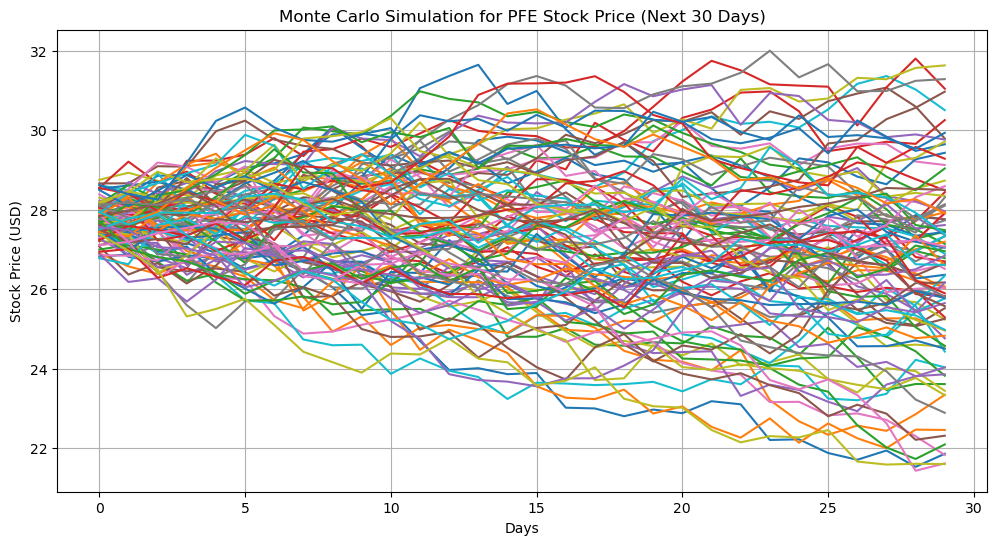

In [52]:
# Plot the simulated prices
plt.figure(figsize=(12, 6))
plt.plot(simulated_prices)
plt.title(f'Monte Carlo Simulation for {symbol} Stock Price (Next 30 Days)')
plt.xlabel('Days')
plt.ylabel('Stock Price (USD)')
plt.grid(True)
plt.show()

In [53]:
# Print the simulated stock prices after 30 days
print("Simulated stock prices after 30 days:")
for i in range(num_simulations):
    print(f"Simulation {i+1}: ${simulated_prices[-1, i]:.2f}")

Simulated stock prices after 30 days:
Simulation 1: $21.85
Simulation 2: $24.96
Simulation 3: $23.61
Simulation 4: $28.44
Simulation 5: $27.36
Simulation 6: $25.52
Simulation 7: $27.96
Simulation 8: $27.07
Simulation 9: $25.23
Simulation 10: $30.50
Simulation 11: $27.75
Simulation 12: $26.07
Simulation 13: $27.44
Simulation 14: $30.25
Simulation 15: $27.95
Simulation 16: $27.75
Simulation 17: $29.12
Simulation 18: $27.73
Simulation 19: $23.44
Simulation 20: $25.76
Simulation 21: $27.44
Simulation 22: $23.34
Simulation 23: $27.14
Simulation 24: $26.70
Simulation 25: $24.76
Simulation 26: $29.79
Simulation 27: $21.82
Simulation 28: $27.33
Simulation 29: $24.55
Simulation 30: $24.03
Simulation 31: $29.43
Simulation 32: $26.01
Simulation 33: $23.82
Simulation 34: $31.04
Simulation 35: $24.03
Simulation 36: $22.31
Simulation 37: $27.90
Simulation 38: $25.81
Simulation 39: $31.63
Simulation 40: $24.43
Simulation 41: $26.36
Simulation 42: $22.45
Simulation 43: $22.09
Simulation 44: $25.29
Sim